In [12]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
# Read the data into dataframe
CRR = pd.read_csv('OBU_fakedata.csv')
CRR

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_PURPOSE,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,D,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,5,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N


In [14]:
# Set a column to calculate the score
CRR['SCORE'] = 0
CRR

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N,0
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N,0
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N,0
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,0


In [15]:
# First trial: Calculating the score according to the client's risk score document
CRR['SCORE'] = CRR['SCORE'] + CRR['PEP_COUNT']*100
CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*100
CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*100

CRR.loc[CRR['CUST_ADVRS'] == 'Y', 'SCORE'] += 100
CRR.loc[CRR['BEARER_SHARE'] == 'Y', 'SCORE'] += 100
CRR.loc[CRR['ISSUE_BEARER'] == 'Y', 'SCORE'] += 100
CRR.loc[CRR['JOB_RISK'] == 'H', 'SCORE'] += 100
CRR.loc[CRR['JOB_RISK'] == 'M', 'SCORE'] += 50
CRR.loc[CRR['JOB_RISK'] == 'L', 'SCORE'] += 1
CRR.loc[CRR['LN_FG'] == 'v', 'SCORE'] += 1
CRR.loc[CRR['IX_FG'] == 'v', 'SCORE'] += 100
CRR.loc[CRR['TR_FG'] == 'v', 'SCORE'] += 1
CRR.loc[CRR['TRUST_YN'] == 'v', 'SCORE'] += 100
CRR.loc[CRR['BD_FG'] == 'v', 'SCORE'] += 1
CRR.loc[CRR['DP_FG'] == 'v', 'SCORE'] += 100
CRR.loc[CRR['WM_FG'] == 'v', 'SCORE'] += 50
CRR.loc[CRR['CD_FG'] == 'v', 'SCORE'] += 1
CRR.loc[CRR['EB_FG'] == 'v', 'SCORE'] += 100

#CRR.loc[CRR['RISK_LEVEL'] == 'H', 'SCORE'] += 100
#CRR.loc[CRR['RISK_LEVEL'] == 'M', 'SCORE'] += 50
#CRR.loc[CRR['RISK_LEVEL'] == 'L', 'SCORE'] += 1

CRR

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,150
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,101
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,350
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,300
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N,200
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N,300
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N,401
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,300


In [16]:
# Sort by the score
CRR = CRR.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
CRR

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE
0,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,NaN,NaN,N,900
1,N,Y,NaN,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,NaN,NaN,N,900
2,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,900
3,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,3.0,NaN,NaN,NaN,N,900
4,N,Y,N,Y,v,v,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N,1
80128,N,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,NaN,NaN,N,1
80129,N,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,1
80130,N,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5Z,0.0,NaN,NaN,0.0,NaN,N,1


In [17]:
# Check how many Y is 'True'
len(CRR[CRR['SAR_ALERT']=='Y'])

1691

In [18]:
# Create a column to save the outcome of prediction
CRR['PREDICT'] = 'N'

In [19]:
# Set data with top Nth score as doubtful
CRR.loc[range(0,len(CRR[CRR['SAR_ALERT']=='Y'])),'PREDICT'] = 'Y'
CRR

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE,PREDICT
0,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,Z,NaN,NaN,N,900,Y
1,N,Y,NaN,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,1.0,Z,NaN,NaN,N,900,Y
2,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,900,Y
3,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,1Z,0.0,3.0,NaN,NaN,NaN,N,900,Y
4,N,Y,N,Y,v,v,v,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,801,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N,1,N
80128,N,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,Z,NaN,NaN,N,1,N
80129,N,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,1,N
80130,N,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5Z,0.0,NaN,NaN,0.0,NaN,N,1,N


In [20]:
# Check the quality of the model
TT_PT = len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')])
TT_PT

67

In [21]:
TT_PF = len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='N')])
TT_PF

1624

In [22]:
TF_PF = len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='N')])
TF_PF

76817

In [23]:
TF_PT = len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='Y')])
TF_PT

1624

In [24]:
accuracy = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]) + len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='N')]))/len(CRR) 
print('accuracy: ', accuracy)

accuracy:  0.9594668796485798


In [25]:
recall = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['SAR_ALERT']=='Y'])
print('recall: ', recall)

recall:  0.039621525724423415


In [26]:
precision = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['PREDICT']=='Y'])
print('precision: ', precision)

precision:  0.039621525724423415


In [27]:
# Second trial: 迎合模擬資料
df = pd.read_csv('OBU_fakedata.csv')
df['SCORE'] = 0
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N,0
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N,0
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N,0
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,0


In [28]:
df.loc[df['CMFCUS1_FINANCIAL_ACT'] == 'Y', 'SCORE'] += 100
df.loc[df['EB_FG'] == 'v', 'SCORE'] += 100
df.loc[df['CDD_STATUS'] == 'N', 'SCORE'] += 100
df['AMT_RANGE'] = df['AMT_RANGE'].fillna(0)
df['SCORE'] = df['SCORE'] + df['AMT_RANGE']*100
df['OBU_ANNUAL_INCOME'] = df['OBU_ANNUAL_INCOME'].fillna(0)
df['SCORE'] = df['SCORE'] + df['OBU_ANNUAL_INCOME']*100
df = df.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE
0,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,1.0,1.0,Z,0.0,NaN,Y,900.0
1,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,Y,900.0
2,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,Y,900.0
3,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,Y,900.0
4,NaN,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,4,0.0,NaN,Y,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,1.0,NaN,Z,0.0,NaN,N,0.0
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5Z,0.0,1.0,Z,0.0,NaN,N,0.0
80129,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,NaN,1.0,NaN,NaN,NaN,N,0.0
80130,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,NaN,0.0,NaN,N,0.0


In [29]:
df['PREDICT'] = 'N'
df.loc[range(0,len(df[df['SAR_ALERT']=='Y'])),'PREDICT'] = 'Y'
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE,PREDICT
0,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,1.0,1.0,Z,0.0,NaN,Y,900.0,Y
1,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,1Z,0.0,1.0,Z,0.0,NaN,Y,900.0,Y
2,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,1.0,NaN,0.0,NaN,Y,900.0,Y
3,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,Z,0.0,NaN,Y,900.0,Y
4,NaN,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,4,0.0,NaN,Y,900.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,v,NaN,NaN,NaN,...,NaN,1Z,1.0,NaN,Z,0.0,NaN,N,0.0,N
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,5Z,0.0,1.0,Z,0.0,NaN,N,0.0,N
80129,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,NaN,1.0,NaN,NaN,NaN,N,0.0,N
80130,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,1Z,0.0,NaN,NaN,0.0,NaN,N,0.0,N


In [30]:
accuracy = (len(df[(df['SAR_ALERT']=='Y') & (df['PREDICT']=='Y')]) + len(df[(df['SAR_ALERT']=='N') & (df['PREDICT']=='N')]))/len(df) 
print('accuracy: ', accuracy)

accuracy:  1.0


In [31]:
recall = (len(df[(df['SAR_ALERT']=='Y') & (df['PREDICT']=='Y')]))/len(df[df['SAR_ALERT']=='Y'])
print('recall: ', recall)

recall:  1.0


In [32]:
precision = (len(df[(df['SAR_ALERT']=='Y') & (df['PREDICT']=='Y')]))/len(df[df['PREDICT']=='Y'])
print('precision: ', precision)

precision:  1.0


In [33]:
df['TARGET'] = (df['CMFCUS1_FINANCIAL_ACT'] == 'Y').astype(int) + (df['EB_FG'] == 'v').astype(int) + (df['CDD_STATUS'] == 'N').astype(int) + (df['AMT_RANGE'].replace('NA', 0)).astype(int) + (df['OBU_ANNUAL_INCOME'].replace('NA', 0)).astype(int)
df.loc[df.TARGET>=7]

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE,PREDICT,TARGET
0,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,1Z,1.0,1.0,Z,0.0,NaN,Y,900.0,Y,9
1,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,1Z,0.0,1.0,Z,0.0,NaN,Y,900.0,Y,9
2,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,1Z,0.0,1.0,NaN,0.0,NaN,Y,900.0,Y,9
3,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,1Z,0.0,NaN,Z,0.0,NaN,Y,900.0,Y,9
4,NaN,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,1Z,0.0,NaN,4,0.0,NaN,Y,900.0,Y,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,5Z,0.0,1.0,Z,0.0,NaN,Y,700.0,Y,7
1687,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,1Z,1.0,1.0,Z,NaN,NaN,Y,700.0,Y,7
1688,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,1Z,0.0,NaN,Z,NaN,NaN,Y,700.0,Y,7
1689,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,1Z,0.0,1.0,NaN,NaN,NaN,Y,700.0,Y,7


In [19]:
df.to_csv('df.csv')

In [34]:
# Third trial: Randomly assign weights for those variables included in the client's risk assessment document
## 正式開始，讀取乾淨資料，加入分數欄位
CRR = pd.read_csv('OBU_fakedata.csv')
CRR['SCORE'] = 0
CRR

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT,SCORE
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N,0
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N,0
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N,0
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N,0
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N,0


In [35]:
# 生成一與變數相等長度之字典，給予各變數一對應隨機值
# Create a dictionary having specific numbers of keys pair with random values
def RandDict(n):
    for i in range(n):
        values = [random.random() for i in range(n)]
        keys = ['key_' + str(i) for i in range(n)]
        dictionary = dict(zip(keys, values))
    return dictionary

In [36]:
# Test the function
Dict = RandDict(5)
Dict

{'key_0': 0.8446972581384187,
 'key_1': 0.6852340920127241,
 'key_2': 0.6363334614231524,
 'key_3': 0.023862756742985658,
 'key_4': 0.4089259365078458}

In [37]:
Dict['key_0']

0.8446972581384187

In [38]:
# Create a blank list to restore outcomes(F1-score, weights of the slope)
# 生成空串列以儲存結果
outcome = []
beta = [None] * 1000
# 模擬 N 次
for i in range(1000):
    Dict = RandDict(18)
    CRR['SCORE'] = CRR['SCORE'] + CRR['PEP_COUNT']*Dict['key_0']
    CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_1']
    CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_2']

    CRR.loc[CRR['CUST_ADVRS'] == 'Y', 'SCORE'] += Dict['key_3']
    CRR.loc[CRR['BEARER_SHARE'] == 'Y', 'SCORE'] += Dict['key_4']
    CRR.loc[CRR['ISSUE_BEARER'] == 'Y', 'SCORE'] += Dict['key_5']
    CRR.loc[CRR['JOB_RISK'] == 'H', 'SCORE'] += Dict['key_6']
    CRR.loc[CRR['JOB_RISK'] == 'M', 'SCORE'] += Dict['key_7']
    CRR.loc[CRR['JOB_RISK'] == 'L', 'SCORE'] += Dict['key_8']
    CRR.loc[CRR['LN_FG'] == 'v', 'SCORE'] += Dict['key_9']
    CRR.loc[CRR['IX_FG'] == 'v', 'SCORE'] += Dict['key_10']
    CRR.loc[CRR['TR_FG'] == 'v', 'SCORE'] += Dict['key_11']
    CRR.loc[CRR['TRUST_YN'] == 'v', 'SCORE'] += Dict['key_12']
    CRR.loc[CRR['BD_FG'] == 'v', 'SCORE'] += Dict['key_13']
    CRR.loc[CRR['DP_FG'] == 'v', 'SCORE'] += Dict['key_14']
    CRR.loc[CRR['WM_FG'] == 'v', 'SCORE'] += Dict['key_15']
    CRR.loc[CRR['CD_FG'] == 'v', 'SCORE'] += Dict['key_16']
    CRR.loc[CRR['EB_FG'] == 'v', 'SCORE'] += Dict['key_17']

    # 分數排序，取與真實 Y 相等數量之預測 Y
    CRR = CRR.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
    CRR['PREDICT'] = 'N'
    CRR.loc[range(0,len(CRR[CRR['SAR_ALERT']=='Y'])),'PREDICT'] = 'Y'

    # 結果預測成效
    recall = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['SAR_ALERT']=='Y'])
    precision = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['PREDICT']=='Y'])
    f1_score = 2*precision*recall/(precision+recall)

    # 儲存結果
    outcome.append(f1_score)
    beta[i] = Dict.values()

In [39]:
outcome

[0.0319337670017741,
 0.039621525724423415,
 0.0319337670017741,
 0.03075103489059728,
 0.03252513305736251,
 0.03725606150206978,
 0.03666469544648137,
 0.03666469544648137,
 0.03666469544648137,
 0.03429923122412774,
 0.03429923122412774,
 0.03725606150206978,
 0.036073329390892965,
 0.03666469544648137,
 0.03784742755765819,
 0.03489059727971614,
 0.03252513305736251,
 0.03311649911295092,
 0.03311649911295092,
 0.033707865168539325,
 0.03429923122412774,
 0.03429923122412774,
 0.03548196333530455,
 0.03489059727971614,
 0.036073329390892965,
 0.036073329390892965,
 0.033707865168539325,
 0.03548196333530455,
 0.03311649911295092,
 0.03429923122412774,
 0.03311649911295092,
 0.03489059727971614,
 0.03429923122412774,
 0.03548196333530455,
 0.03489059727971614,
 0.033707865168539325,
 0.03489059727971614,
 0.03311649911295092,
 0.03548196333530455,
 0.03311649911295092,
 0.03489059727971614,
 0.033707865168539325,
 0.03489059727971614,
 0.03311649911295092,
 0.03489059727971614,
 0.0

(array([  1.,   4.,  15.,  17.,   9.,  65., 321., 406., 147.,  15.]),
 array([0.03075103, 0.03181549, 0.03287995, 0.03394441, 0.03500887,
        0.03607333, 0.03713779, 0.03820225, 0.03926671, 0.04033116,
        0.04139562]),
 <BarContainer object of 10 artists>)

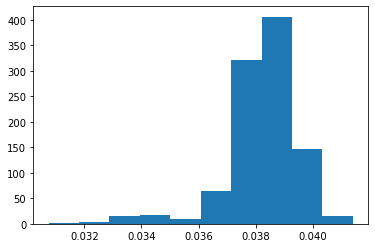

In [40]:
# The distribution of outcomes
# 結果分配
plt.hist(outcome)

In [41]:
# The best outcome
# 最佳結果
max(outcome)

0.04139562389118864

In [42]:
# Find where is the best outcome
outcome.index(max(outcome))

78

In [43]:
# Call the weights of the best outcome, and it would be an useful anchor for our model
# 最佳結果係數
beta[outcome.index(max(outcome))]

dict_values([0.6672174968986446, 0.1722351182626527, 0.7614694318164287, 0.2733380095626765, 0.9877499693075573, 0.3040033048489683, 0.6847689394318155, 0.4045872298669758, 0.3293836689186792, 0.24753520556255582, 0.44762956222794725, 0.17075157454651835, 0.3973274368828207, 0.8710149410238065, 0.342097119313862, 0.0017788585332431106, 0.34843741065649947, 0.7451495144645264])

In [44]:
## 4th Trial: Adjust the method, predicting top 5% as doubtful but not as same as the numbers of true Y
## 換假設
CRR = pd.read_csv('OBU_fakedata.csv')
CRR['SCORE'] = 0

def RandDict(n):
    for i in range(n):
        values = [random.random() for i in range(n)]
        keys = ['key_' + str(i) for i in range(n)]
        dictionary = dict(zip(keys, values))
    return dictionary

outcome = []
beta = [None] * 1000

for i in range(1000):
    Dict = RandDict(18)
    CRR['SCORE'] = CRR['SCORE'] + CRR['PEP_COUNT']*Dict['key_0']
    CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_1']
    CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_2']

    CRR.loc[CRR['CUST_ADVRS'] == 'Y', 'SCORE'] += Dict['key_3']
    CRR.loc[CRR['BEARER_SHARE'] == 'Y', 'SCORE'] += Dict['key_4']
    CRR.loc[CRR['ISSUE_BEARER'] == 'Y', 'SCORE'] += Dict['key_5']
    CRR.loc[CRR['JOB_RISK'] == 'H', 'SCORE'] += Dict['key_6']
    CRR.loc[CRR['JOB_RISK'] == 'M', 'SCORE'] += Dict['key_7']
    CRR.loc[CRR['JOB_RISK'] == 'L', 'SCORE'] += Dict['key_8']
    CRR.loc[CRR['LN_FG'] == 'v', 'SCORE'] += Dict['key_9']
    CRR.loc[CRR['IX_FG'] == 'v', 'SCORE'] += Dict['key_10']
    CRR.loc[CRR['TR_FG'] == 'v', 'SCORE'] += Dict['key_11']
    CRR.loc[CRR['TRUST_YN'] == 'v', 'SCORE'] += Dict['key_12']
    CRR.loc[CRR['BD_FG'] == 'v', 'SCORE'] += Dict['key_13']
    CRR.loc[CRR['DP_FG'] == 'v', 'SCORE'] += Dict['key_14']
    CRR.loc[CRR['WM_FG'] == 'v', 'SCORE'] += Dict['key_15']
    CRR.loc[CRR['CD_FG'] == 'v', 'SCORE'] += Dict['key_16']
    CRR.loc[CRR['EB_FG'] == 'v', 'SCORE'] += Dict['key_17']
    
    # 分數排序，取前 5% 分數者作為預測 Y
    CRR = CRR.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
    CRR['PREDICT'] = 'N'
    CRR.loc[range(0,round(len(CRR)*0.5)),'PREDICT'] = 'Y'
    
    recall = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['SAR_ALERT']=='Y'])
    precision = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['PREDICT']=='Y'])
    f1_score = 2*precision*recall/(precision+recall)
    
    outcome.append(f1_score)
    beta[i] = Dict.values()

(array([ 76., 111., 332., 204., 207.,  58.,   7.,   2.,   1.,   2.]),
 array([0.04942884, 0.05090883, 0.05238882, 0.05386881, 0.0553488 ,
        0.0568288 , 0.05830879, 0.05978878, 0.06126877, 0.06274876,
        0.06422875]),
 <BarContainer object of 10 artists>)

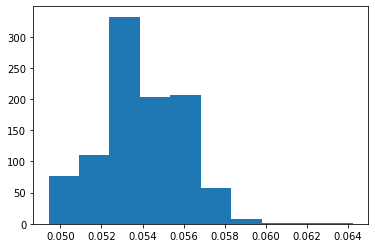

In [45]:
plt.hist(outcome)

In [46]:
max(outcome)

0.06422875206552196

In [47]:
beta[outcome.index(max(outcome))]

dict_values([0.8068848151667771, 0.8108491991664847, 0.8685550798195886, 0.48936505863355706, 0.9105939409818165, 0.8232693924027246, 0.2662698458424715, 0.9537777664182376, 0.09059109181034286, 0.45925288578306933, 0.21475544186065432, 0.06378746236280353, 0.822380917396798, 0.9496471788566562, 0.03338042669661234, 0.09587965291042588, 0.5048934859236228, 0.9903457330375268])

In [48]:
# Feed the best outcome into the model and check the quality of prediction for it
# 代入最佳結果
CRR = pd.read_csv('OBU_fakedata.csv')
CRR['SCORE'] = 0

values = beta[outcome.index(max(outcome))]
keys = ['key_' + str(i) for i in range(18)]
Dict = dict(zip(keys, values))

CRR['SCORE'] = CRR['SCORE'] + CRR['PEP_COUNT']*Dict['key_0']
CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_1']
CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_2']

CRR.loc[CRR['CUST_ADVRS'] == 'Y', 'SCORE'] += Dict['key_3']
CRR.loc[CRR['BEARER_SHARE'] == 'Y', 'SCORE'] += Dict['key_4']
CRR.loc[CRR['ISSUE_BEARER'] == 'Y', 'SCORE'] += Dict['key_5']
CRR.loc[CRR['JOB_RISK'] == 'H', 'SCORE'] += Dict['key_6']
CRR.loc[CRR['JOB_RISK'] == 'M', 'SCORE'] += Dict['key_7']
CRR.loc[CRR['JOB_RISK'] == 'L', 'SCORE'] += Dict['key_8']
CRR.loc[CRR['LN_FG'] == 'v', 'SCORE'] += Dict['key_9']
CRR.loc[CRR['IX_FG'] == 'v', 'SCORE'] += Dict['key_10']
CRR.loc[CRR['TR_FG'] == 'v', 'SCORE'] += Dict['key_11']
CRR.loc[CRR['TRUST_YN'] == 'v', 'SCORE'] += Dict['key_12']
CRR.loc[CRR['BD_FG'] == 'v', 'SCORE'] += Dict['key_13']
CRR.loc[CRR['DP_FG'] == 'v', 'SCORE'] += Dict['key_14']
CRR.loc[CRR['WM_FG'] == 'v', 'SCORE'] += Dict['key_15']
CRR.loc[CRR['CD_FG'] == 'v', 'SCORE'] += Dict['key_16']
CRR.loc[CRR['EB_FG'] == 'v', 'SCORE'] += Dict['key_17']

CRR = CRR.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
CRR['PREDICT'] = 'N'
CRR.loc[range(0,round(len(CRR)*0.05)),'PREDICT'] = 'Y'

accuracy = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]) + len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='N')]))/len(CRR) 
recall = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['SAR_ALERT']=='Y'])
precision = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['PREDICT']=='Y'])
f1_score = 2*precision*recall/(precision+recall)
TT_PT = len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')])
TT_PF = len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='N')])
TF_PF = len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='N')])
TF_PT = len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='Y')])

In [49]:
print('Accuracy: ', accuracy, 'f1: ', f1_score, 'TT_PT: ', TT_PT, 'TT_PF: ', TT_PF, 'TF_PF: ', TF_PF, 'TF_PT: ', TF_PT)

Accuracy:  0.9323366445365148 f1:  0.04843804843804844 TT_PT:  138 TT_PF:  1553 TF_PF:  74572 TF_PT:  3869


In [50]:
print(recall, precision)

0.08160851567120048 0.03443973047167457


In [55]:
## 5th Trial: Applying the randomly-weights-assigning method to those variables the simulated data really including
## 換變數去迎合模擬資料
df = pd.read_csv('OBU_fakedata.csv')
df['SCORE'] = 0

def RandDict(n):
    for i in range(n):
        values = [random.random() for i in range(n)]
        keys = ['key_' + str(i) for i in range(n)]
        dictionary = dict(zip(keys, values))
    return dictionary

outcome = []
beta = [None] * 100

for i in range(100):
    Dict = RandDict(5)
    df.loc[df['CMFCUS1_FINANCIAL_ACT'] == 'Y', 'SCORE'] += Dict['key_0']
    df.loc[df['EB_FG'] == 'v', 'SCORE'] += Dict['key_1']
    df.loc[df['CDD_STATUS'] == 'N', 'SCORE'] += Dict['key_2']
    df['AMT_RANGE'] = df['AMT_RANGE'].fillna(0)
    df['SCORE'] = df['SCORE'] + df['AMT_RANGE']*Dict['key_3']
    df['OBU_ANNUAL_INCOME'] = df['OBU_ANNUAL_INCOME'].fillna(0)
    df['SCORE'] = df['SCORE'] + df['OBU_ANNUAL_INCOME']*Dict['key_4']

    
    # 分數排序，取真實 Y數量生成預測 Y
    df = df.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
    df['PREDICT'] = 'N'
    df.loc[range(0,len(df[df['SAR_ALERT']=='Y'])),'PREDICT'] = 'Y'
    
    recall = (len(df[(df['SAR_ALERT']=='Y') & (df['PREDICT']=='Y')]))/len(df[df['SAR_ALERT']=='Y'])
    precision = (len(df[(df['SAR_ALERT']=='Y') & (df['PREDICT']=='Y')]))/len(df[df['PREDICT']=='Y'])
    f1_score = 2*precision*recall/(precision+recall)
    
    outcome.append(f1_score)
    beta[i] = Dict.values()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., 97.]),
 array([0.66765228, 0.70088705, 0.73412182, 0.76735659, 0.80059137,
        0.83382614, 0.86706091, 0.90029568, 0.93353046, 0.96676523,
        1.        ]),
 <BarContainer object of 10 artists>)

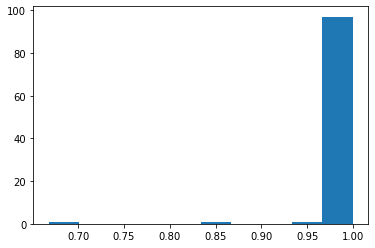

In [56]:
plt.hist(outcome)

In [57]:
max(outcome)

1.0

In [58]:
beta[outcome.index(max(outcome))]

dict_values([0.9419838434727796, 0.8848937509964383, 0.5134656920956769, 0.9573094144616435, 0.4522601194750723])

In [61]:
## 6th Trial: Applying the randomly-weights-assigning method to all variables included above
## 換變數，包含模擬資料實際使用變數 & 客戶風險評估文件變數
CRR = pd.read_csv('OBU_fakedata.csv')
CRR['SCORE'] = 0

def RandDict(n):
    for i in range(n):
        values = [random.random() for i in range(n)]
        keys = ['key_' + str(i) for i in range(n)]
        dictionary = dict(zip(keys, values))
    return dictionary

outcome = []
beta = [None] * 1000

for i in range(1000):
    Dict = RandDict(22)
    CRR.loc[CRR['CMFCUS1_FINANCIAL_ACT'] == 'Y', 'SCORE'] += Dict['key_0']
    CRR.loc[CRR['EB_FG'] == 'v', 'SCORE'] += Dict['key_1']
    CRR.loc[CRR['CDD_STATUS'] == 'N', 'SCORE'] += Dict['key_2']
    CRR['AMT_RANGE'] = CRR['AMT_RANGE'].fillna(0)
    CRR['SCORE'] = CRR['SCORE'] + CRR['AMT_RANGE']*Dict['key_3']
    CRR['OBU_ANNUAL_INCOME'] = CRR['OBU_ANNUAL_INCOME'].fillna(0)
    CRR['SCORE'] = CRR['SCORE'] + CRR['OBU_ANNUAL_INCOME']*Dict['key_4']
    
    CRR['SCORE'] = CRR['SCORE'] + CRR['PEP_COUNT']*Dict['key_5']
    CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_6']
    CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_7']

    CRR.loc[CRR['CUST_ADVRS'] == 'Y', 'SCORE'] += Dict['key_8']
    CRR.loc[CRR['BEARER_SHARE'] == 'Y', 'SCORE'] += Dict['key_9']
    CRR.loc[CRR['ISSUE_BEARER'] == 'Y', 'SCORE'] += Dict['key_10']
    CRR.loc[CRR['JOB_RISK'] == 'H', 'SCORE'] += Dict['key_11']
    CRR.loc[CRR['JOB_RISK'] == 'M', 'SCORE'] += Dict['key_12']
    CRR.loc[CRR['JOB_RISK'] == 'L', 'SCORE'] += Dict['key_13']
    CRR.loc[CRR['LN_FG'] == 'v', 'SCORE'] += Dict['key_14']
    CRR.loc[CRR['IX_FG'] == 'v', 'SCORE'] += Dict['key_15']
    CRR.loc[CRR['TR_FG'] == 'v', 'SCORE'] += Dict['key_16']
    CRR.loc[CRR['TRUST_YN'] == 'v', 'SCORE'] += Dict['key_17']
    CRR.loc[CRR['BD_FG'] == 'v', 'SCORE'] += Dict['key_18']
    CRR.loc[CRR['DP_FG'] == 'v', 'SCORE'] += Dict['key_19']
    CRR.loc[CRR['WM_FG'] == 'v', 'SCORE'] += Dict['key_20']
    CRR.loc[CRR['CD_FG'] == 'v', 'SCORE'] += Dict['key_21']
    
    # 分數排序，取真實 Y數量生成預測 Y
    CRR = CRR.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
    CRR['PREDICT'] = 'N'
    CRR.loc[range(0,len(CRR[CRR['SAR_ALERT']=='Y'])),'PREDICT'] = 'Y'
    
    recall = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['SAR_ALERT']=='Y'])
    precision = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['PREDICT']=='Y'])
    f1_score = 2*precision*recall/(precision+recall)
    
    outcome.append(f1_score)
    beta[i] = Dict.values()

(array([  1.,   0.,   0.,   1.,   0.,   2.,  83., 201., 642.,  70.]),
 array([0.28503844, 0.32460083, 0.36416322, 0.40372561, 0.443288  ,
        0.48285038, 0.52241277, 0.56197516, 0.60153755, 0.64109994,
        0.68066233]),
 <BarContainer object of 10 artists>)

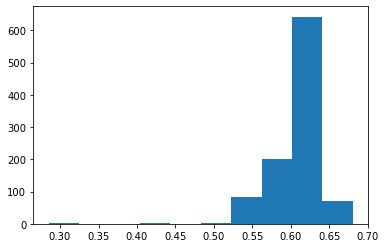

In [62]:
plt.hist(outcome)

In [63]:
max(outcome)

0.6806623299822591

In [64]:
beta[outcome.index(max(outcome))]

dict_values([0.24602593678777374, 0.8578670186134844, 0.4557155978140046, 0.11262245344203803, 0.9480914572277374, 0.47028188352908007, 0.24629754150900562, 0.06600459169768547, 0.515279772527338, 0.4603384112685097, 0.7379060210957289, 0.8561209665133518, 0.7730951220199666, 0.4509350281862794, 0.023568545545428532, 0.9242878878686185, 0.8212215750619472, 0.4153929613396006, 0.35273096426558637, 0.47021362901145625, 0.6361193474209801, 0.9802014170898756])

In [69]:
# Feed the best outcome into the model and check the quality of prediction for it
# 代入最佳結果
CRR = pd.read_csv('OBU_fakedata.csv')
CRR['SCORE'] = 0

values = beta[outcome.index(max(outcome))]
keys = ['key_' + str(i) for i in range(22)]
Dict = dict(zip(keys, values))

CRR.loc[CRR['CMFCUS1_FINANCIAL_ACT'] == 'Y', 'SCORE'] += Dict['key_0']
CRR.loc[CRR['EB_FG'] == 'v', 'SCORE'] += Dict['key_1']
CRR.loc[CRR['CDD_STATUS'] == 'N', 'SCORE'] += Dict['key_2']
CRR['AMT_RANGE'] = CRR['AMT_RANGE'].fillna(0)
CRR['SCORE'] = CRR['SCORE'] + CRR['AMT_RANGE']*Dict['key_3']
CRR['OBU_ANNUAL_INCOME'] = CRR['OBU_ANNUAL_INCOME'].fillna(0)
CRR['SCORE'] = CRR['SCORE'] + CRR['OBU_ANNUAL_INCOME']*Dict['key_4']
    
CRR['SCORE'] = CRR['SCORE'] + CRR['PEP_COUNT']*Dict['key_5']
CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_6']
CRR['SCORE'] = CRR['SCORE'] + CRR['REL_ADVRS_COUNT']*Dict['key_7']

CRR.loc[CRR['CUST_ADVRS'] == 'Y', 'SCORE'] += Dict['key_8']
CRR.loc[CRR['BEARER_SHARE'] == 'Y', 'SCORE'] += Dict['key_9']
CRR.loc[CRR['ISSUE_BEARER'] == 'Y', 'SCORE'] += Dict['key_10']
CRR.loc[CRR['JOB_RISK'] == 'H', 'SCORE'] += Dict['key_11']
CRR.loc[CRR['JOB_RISK'] == 'M', 'SCORE'] += Dict['key_12']
CRR.loc[CRR['JOB_RISK'] == 'L', 'SCORE'] += Dict['key_13']
CRR.loc[CRR['LN_FG'] == 'v', 'SCORE'] += Dict['key_14']
CRR.loc[CRR['IX_FG'] == 'v', 'SCORE'] += Dict['key_15']
CRR.loc[CRR['TR_FG'] == 'v', 'SCORE'] += Dict['key_16']
CRR.loc[CRR['TRUST_YN'] == 'v', 'SCORE'] += Dict['key_17']
CRR.loc[CRR['BD_FG'] == 'v', 'SCORE'] += Dict['key_18']
CRR.loc[CRR['DP_FG'] == 'v', 'SCORE'] += Dict['key_19']
CRR.loc[CRR['WM_FG'] == 'v', 'SCORE'] += Dict['key_20']
CRR.loc[CRR['CD_FG'] == 'v', 'SCORE'] += Dict['key_21']

CRR = CRR.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
CRR['PREDICT'] = 'N'
CRR.loc[range(0,round(len(CRR)*0.05)),'PREDICT'] = 'Y'

accuracy = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]) + len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='N')]))/len(CRR) 
recall = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['SAR_ALERT']=='Y'])
precision = (len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')]))/len(CRR[CRR['PREDICT']=='Y'])
f1_score = 2*precision*recall/(precision+recall)
TT_PT = len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='Y')])
TT_PF = len(CRR[(CRR['SAR_ALERT']=='Y') & (CRR['PREDICT']=='N')])
TF_PF = len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='N')])
TF_PT = len(CRR[(CRR['SAR_ALERT']=='N') & (CRR['PREDICT']=='Y')])

In [70]:
print('Accuracy: ', accuracy, 'f1: ', f1_score, 'TT_PT: ', TT_PT, 'TT_PF: ', TT_PF, 'TF_PF: ', TF_PF, 'TF_PT: ', TF_PT)

Accuracy:  0.9574202565766485 f1:  0.40119340119340124 TT_PT:  1143 TT_PF:  548 TF_PF:  75577 TF_PT:  2864


In [71]:
print(recall, precision)

0.6759314015375517 0.28525081108060896
